In [29]:
import pandas as pd 
import matplotlib.pyplot as  plt
import seaborn as sbn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

DATA collection and processing


In [30]:
car_dataset = pd.read_csv("C:\\Users\\abhin\\OneDrive\\Desktop\\Machine_Learning\\Projects\\Car Price Prediction model\\dataset\\car data.csv")

In [31]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
#cheking the number of rows and columns 
car_dataset.shape

(301, 9)

In [33]:
#getting info about this dataframe or datatset
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
#CHeking the missing values 
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [35]:
#Cheking the distribution of categorical data i.e. how many of the cars are petrol one and diesel one , which is manual and automatic one 

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())	

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [36]:
#Since computers understand numbers better than text so cooonverting text ones into numbers i.e. encoding them 
#encoding fuel type dataset
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


C:\Users\abhin\AppData\Local\Temp\ipykernel_14220\1658690778.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_14220\1658690778.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_14220\1658690778.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [37]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


Splitting data into Training and Test data

In [38]:


X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)

Y = car_dataset['Selling_Price']

In [39]:

print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            1             0   
1    2013           9.54       43000          1            1             0   
2    2017           9.85        6900          0            1             0   
3    2011           4.15        5200          0            1             0   
4    2014           6.87       42450          1            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            1             0   
297  2015           5.90       60000          0            1             0   
298  2009          11.00       87934          0            1             0   
299  2017          12.50        9000          1            1             0   
300  2016           5.90        5464          0            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Spilliting Training and Test data

In [40]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X, Y,test_size=0.1,random_state=2 )

MOdel Training

LInear Regression

In [41]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

MOdel Evaluation


In [42]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

#Using Rsquared error 
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("The rsquared error is " , error_score)

The rsquared error is  0.8799451660493699


VIsulaising actual and predicted prices

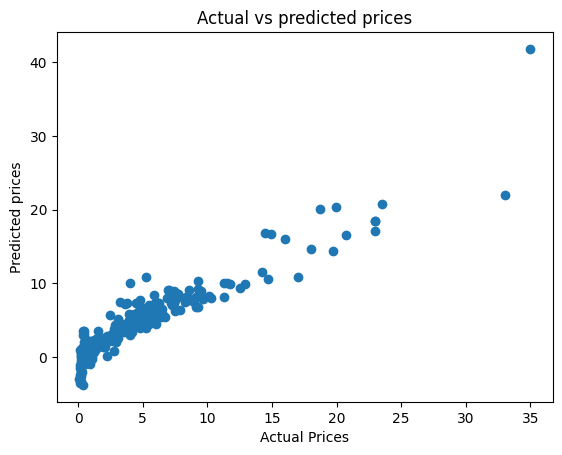

In [43]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs predicted prices")
plt.show()

Testing the model

In [44]:
test_data_prediction = lin_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test,test_data_prediction)
print("The rsquared error is " , error_score)


The rsquared error is  0.8365766715026473


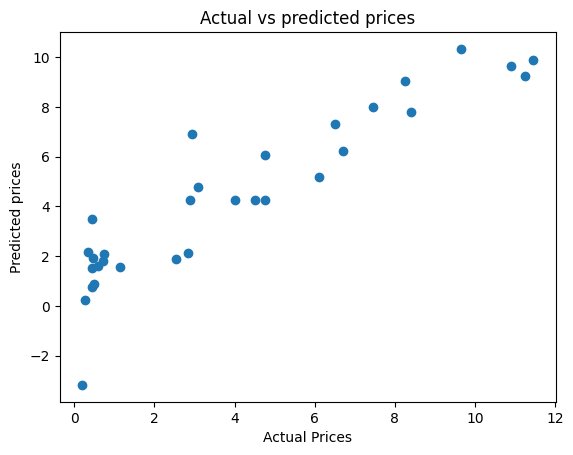

In [45]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs predicted prices")
plt.show()

Lasso Regression

In [46]:
las_reg_model = Lasso()

las_reg_model.fit(X_train,Y_train)

#Prediction on training data
training_data_prediction = las_reg_model.predict(X_train)

#Using Rsquared error 
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("The rsquared error is " , error_score)



The rsquared error is  0.8427856123435795


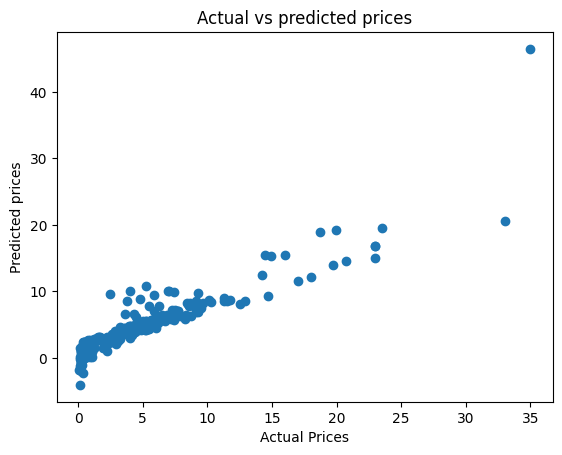

In [47]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs predicted prices")
plt.show()

In [48]:
test_data_prediction = las_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test,test_data_prediction)
print("The rsquared error is " , error_score)


The rsquared error is  0.8709167941173201


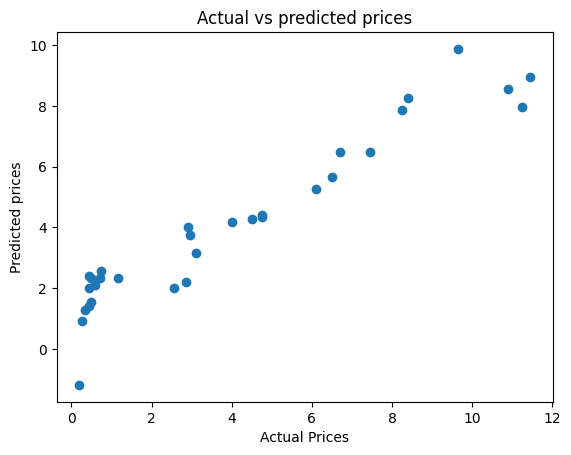

In [49]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs predicted prices")
plt.show()